In [1]:
import asyncio
from pyppeteer import launch
from PIL import Image
import io

In [2]:
async def main():
    browser = await launch()
    page = await browser.newPage()
    await page.goto('https://example.com')
    await page.screenshot({'path': 'example.png'})
    await browser.close()

asyncio.get_event_loop().run_until_complete(main())

RuntimeError: This event loop is already running

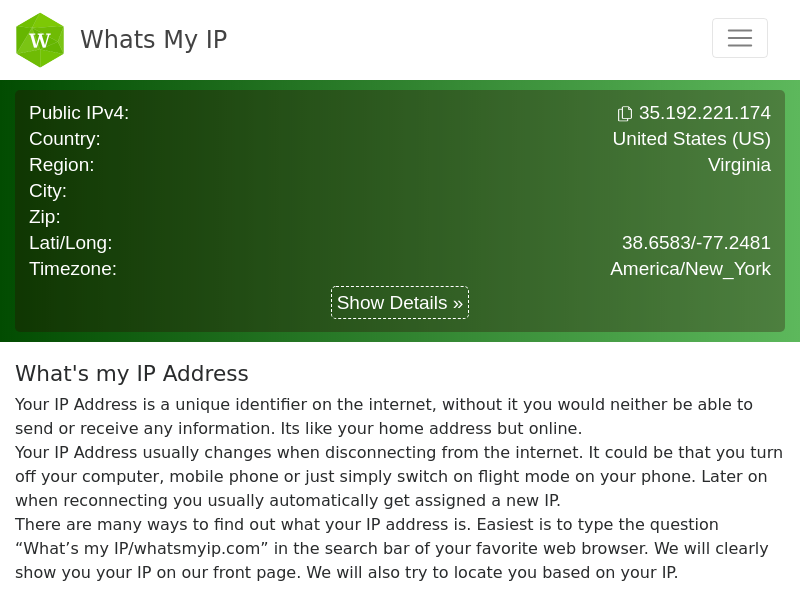

In [3]:
browser = await launch()
page = await browser.newPage()
await page.goto('https://whatsmyip.com')
await page.screenshot({'path': 'example.png'})
await browser.close()
display(Image.open('example.png'))

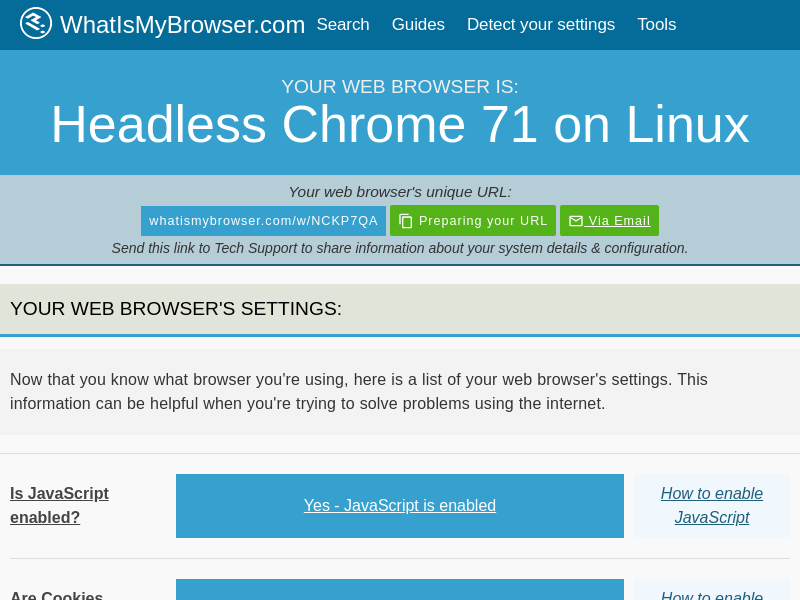

In [2]:
browser = await launch()
page = await browser.newPage()
await page.goto('https://whatismybrowser.com')
await page.screenshot({'path': 'example.png'})
await browser.close()
display(Image.open('example.png'))

request contd: document https://www.interasia.cc/content/c_service/cargo_tracking.aspx?SiteID=1
request contd: stylesheet https://www.interasia.cc/css/en/reset.css
request contd: stylesheet https://www.interasia.cc/css/en/layout.css
request contd: stylesheet https://www.interasia.cc/css/en/page.css
request contd: stylesheet https://www.interasia.cc/css/en/editable_content.css
request contd: stylesheet https://www.interasia.cc/css/en/colorbox.css
request contd: script https://www.interasia.cc/js/jquery-latest.min.js
request contd: script https://www.interasia.cc/js/jquery.js
request contd: script https://www.interasia.cc/WebResource.axd?d=kYOY4iKkMeiGmZhy3hEefq0S5EZ_O3Z9zqHgtYaki7VRLPPnqNMoFbSZKZXkGfDNDzELRzb4_Zq0csdTOOS11N_DQD01&t=637291086790368644
request abort: image https://www.interasia.cc/images/en/pic/menu01.jpg
request abort: image https://www.interasia.cc/images/en/pic/menu02.jpg
request abort: image https://www.interasia.cc/images/en/pic/menu03.jpg
request abort: image https:

request abort: script https://www.google-analytics.com/analytics.js
request abort: image https://www.interasia.cc/images/en/bg/menuArea.png
request abort: image https://www.interasia.cc/images/en/btn/btn_search.jpg
request abort: image https://www.interasia.cc/images/en/logo.png
request abort: image https://www.interasia.cc/images/en/btn/btn_index_1.png
request abort: image https://www.interasia.cc/images/en/icon_randomcode.png
request abort: image https://www.interasia.cc/images/en/icon_social_network.png
request abort: image https://www.interasia.cc/images/en/icon_font_size.png
request abort: image https://www.interasia.cc/images/en/icon_toolbar.png
request abort: image https://www.interasia.cc/images/en/icon/page-dds_chk.png
request abort: image https://www.interasia.cc/images/en/icon/page-cargotracking.png
request abort: image https://www.interasia.cc/images/en/icon/page-telexrelease.png
request abort: image https://www.interasia.cc/images/en/icon/page-shippingschedule.png
request 

request contd: document https://www.interasia.cc/WebTools/RandomCode.ashx?Code=
response: document https://www.interasia.cc/WebTools/RandomCode.ashx?Code=


request contd: document https://www.interasia.cc/WebTools/RandomCode.ashx?Code=
response: document https://www.interasia.cc/WebTools/RandomCode.ashx?Code=


request contd: document https://www.interasia.cc/WebTools/RandomCode.ashx?Code=
response: document https://www.interasia.cc/WebTools/RandomCode.ashx?Code=


request contd: document https://www.interasia.cc/WebTools/RandomCode.ashx?Code=


Task exception was never retrieved
future: <Task finished coro=<async-def-wrapper.<locals>.interceptResponse() done, defined at /tmp/ipykernel_103/3360569164.py:30> exception=NetworkError('Protocol error Network.getResponseBody: Target closed.')>
Traceback (most recent call last):
  File "/tmp/ipykernel_103/3360569164.py", line 35, in interceptResponse
    page.on('response', lambda interceptedResponse: asyncio.ensure_future(interceptResponse(interceptedResponse)))
  File "/srv/conda/envs/notebook/lib/python3.7/site-packages/pyppeteer/network_manager.py", line 654, in _bufread
    'requestId': self._request._requestId
pyppeteer.errors.NetworkError: Protocol error Network.getResponseBody: Target closed.


response: document https://www.interasia.cc/WebTools/RandomCode.ashx?Code=


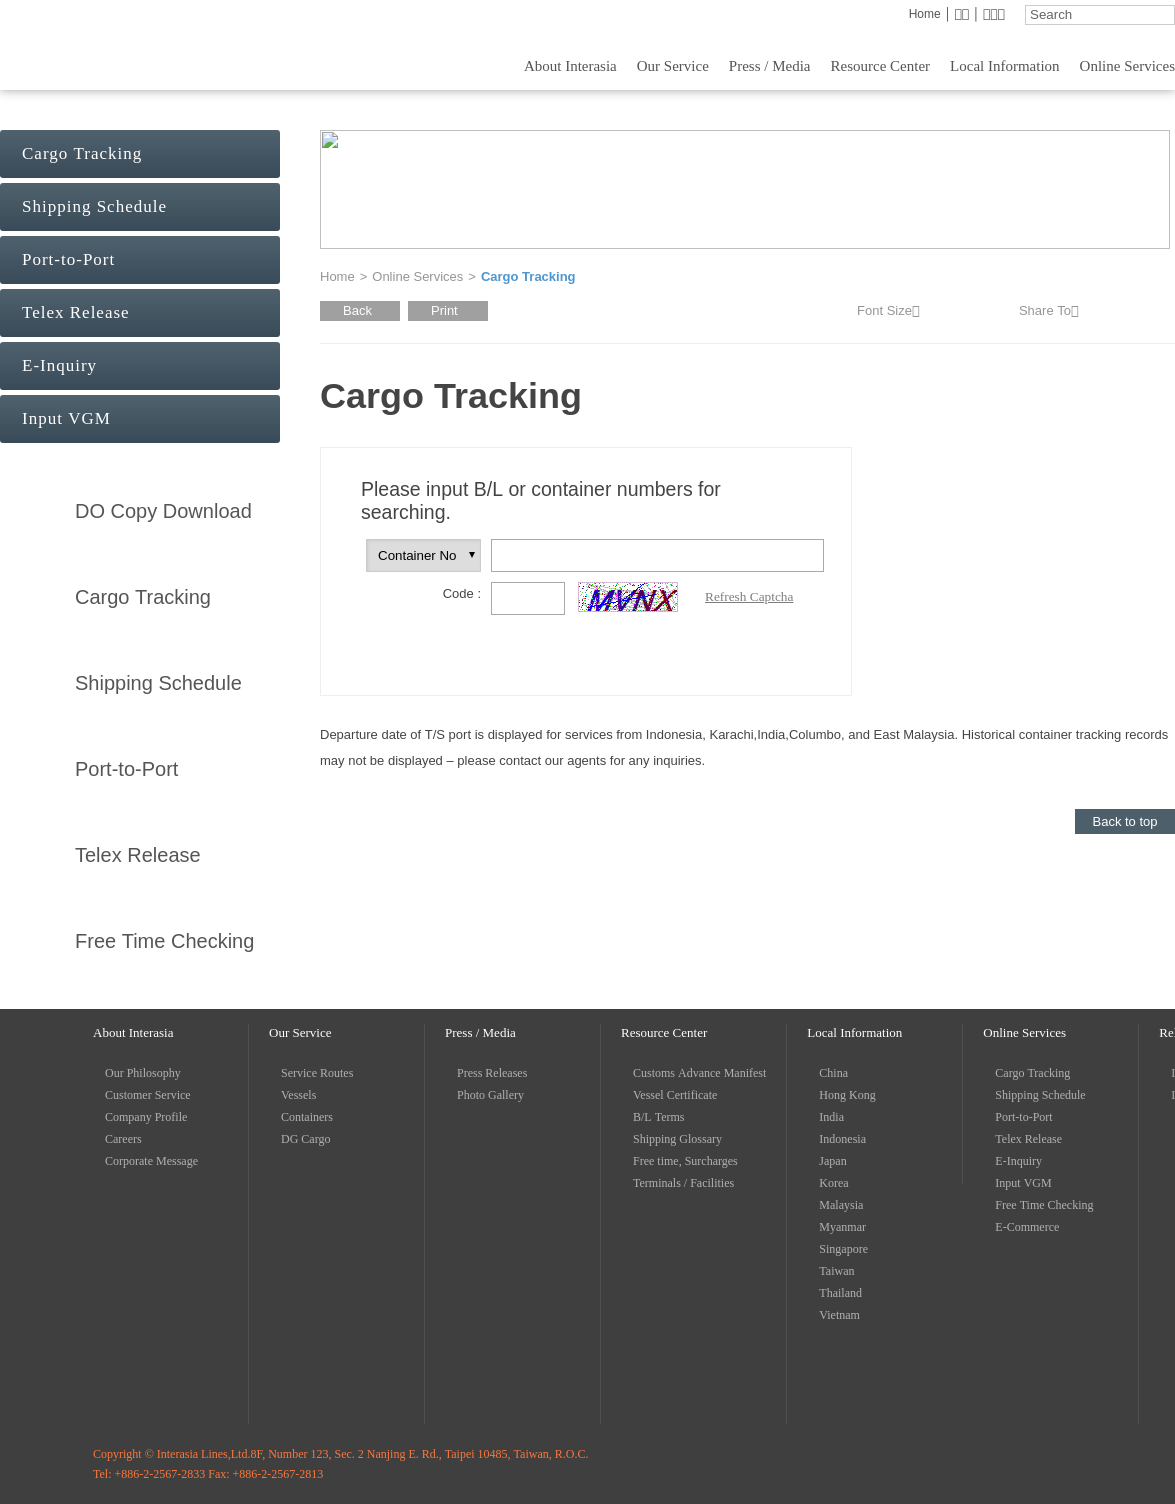

In [2]:
browser = await launch(ignoreHTTPSErrors=True)
page = await browser.newPage()
url = 'https://www.interasia.cc/content/c_service/cargo_tracking.aspx?SiteID=1'
url_captcha = 'https://www.interasia.cc/WebTools/RandomCode.ashx?Code='
url_abort = 'google-analytics.com'

images = []

async def interceptRequest(interceptedRequest):
    if url_abort in interceptedRequest.url :
        print("request abort: " + interceptedRequest.resourceType + " " + interceptedRequest.url )
        await interceptedRequest.abort()
        return        
    if interceptedRequest.resourceType != 'image' :
        print("request contd: " + interceptedRequest.resourceType + " " + interceptedRequest.url )
        await interceptedRequest.continue_()
        return
    if url_captcha not in interceptedRequest.url :
        print("request abort: " + interceptedRequest.resourceType + " " + interceptedRequest.url )
        await interceptedRequest.abort()
        return
    print("request contd: " + interceptedRequest.resourceType + " " + interceptedRequest.url )
    await interceptedRequest.continue_()
page.on('request', lambda interceptedRequest: asyncio.ensure_future(interceptRequest(interceptedRequest)))
await page.setRequestInterception(True)

async def interceptResponse(interceptedResponse):
    if url_captcha not in interceptedResponse.request.url :
    #if interceptedResponse.request.resourceType != 'image':
        return
    print("response: " + interceptedResponse.request.resourceType + " " + interceptedResponse.request.url )
    image = Image.open(io.BytesIO(await interceptedResponse.buffer()))
    display(image)
    images.append(image)
page.on('response', lambda interceptedResponse: asyncio.ensure_future(interceptResponse(interceptedResponse)))

await page.goto(url)
await page.screenshot({'path': 'example.png', 'fullPage': 'true'})
cont = await page.content()

await page.goto(url_captcha)
await page.goto(url_captcha)
await page.goto(url_captcha)
await page.goto(url_captcha)
await page.goto(url_captcha)

await browser.close()
display(Image.open('example.png'))
#print(cont)

In [9]:
import requests
from pydantic import BaseModel
from typing import List
from typing import Optional
from PIL import Image
import io
import base64

class Captcha(BaseModel):
    url: str
    imagedata: List[str]


imagedata = []
for im in images :
    output = io.BytesIO()
    im.save(output, format=im.format)
    display(im)
    imagedata.append(base64.b64encode(output.getvalue()).decode('ascii'))
c = Captcha(url="https:123.com", imagedata=imagedata)
#print(c)
#print(c.dict())

r = requests.post("http://localhost:8000/captcha", json=c.dict())
print("Status code:", r.status_code)
print("Response:", r.json())

Status code: 200
Response: {'AVN X': 8}
